# Logistic Regression on Iris (Colab-ready)

A gentle, end-to-end notebook for **Logistic Regression** using the classic **Iris** dataset.

We will:
1. Load the data
2. Explore and visualize
3. Split into train/test
4. Train Logistic Regression
5. Evaluate with accuracy, confusion matrix, classification report
6. Try a few test-time predictions

**Tip:** Run cells from top to bottom. If you get a warning about convergence, we set a higher `max_iter` later.


In [1]:
# 0) Setup: install/upgrade packages if needed (Colab usually has these)
import sys
print(sys.version)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
%matplotlib inline


3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


## 1) Load the Iris dataset
We'll use `sklearn.datasets.load_iris`. It returns features `data`, labels `target`, and metadata like feature names and target names.

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
target_names = iris.target_names
feature_names = iris.feature_names
print(f"Shape X: {X.shape}, y: {y.shape}")
X.head()

Shape X: (150, 4), y: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2) Quick EDA & Visualization
- Peek at basic statistics
- Plot histograms
- A simple scatter plot (petal length vs petal width)

> We stick to `matplotlib` to keep it lightweight and portable.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


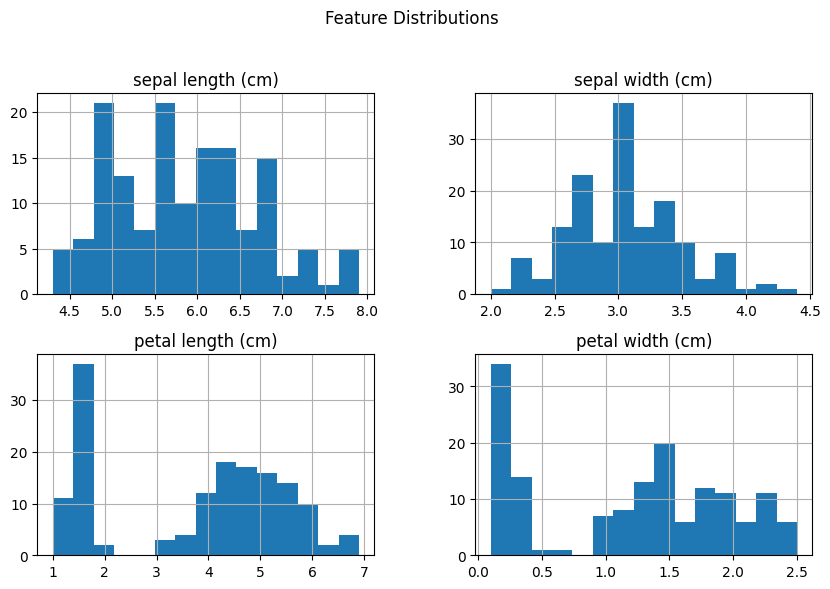

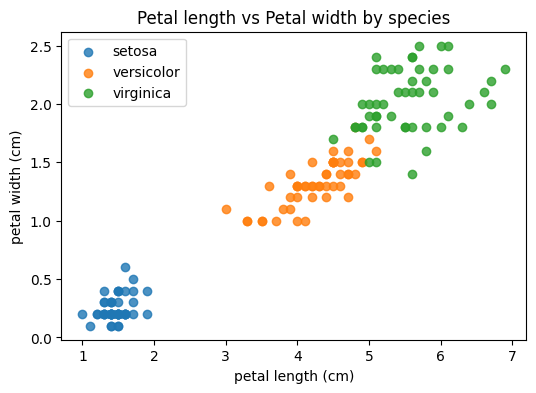

In [3]:
display(X.describe())

# Histograms for each feature
ax = X.hist(bins=15, figsize=(10,6))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Simple scatter: petal length vs petal width colored by species
plt.figure(figsize=(6,4))
for cls in np.unique(y):
    mask = (y == cls)
    plt.scatter(X.loc[mask, feature_names[2]], X.loc[mask, feature_names[3]], label=target_names[cls], alpha=0.8)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title("Petal length vs Petal width by species")
plt.legend()
plt.show()

## 3) Train/Test Split
We'll do a stratified split so that each class is represented proportionally in both training and testing sets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train class counts:\n", y_train.value_counts().sort_index())
print("Test class counts:\n", y_test.value_counts().sort_index())

Train shape: (120, 4)  Test shape: (30, 4)
Train class counts:
 target
0    40
1    40
2    40
Name: count, dtype: int64
Test class counts:
 target
0    10
1    10
2    10
Name: count, dtype: int64


## 4) (Optional) Feature Scaling
Logistic Regression can benefit from scaling. We will standardize features using `StandardScaler`.

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_train_scaled[:3]

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496]])

## 5) Train Logistic Regression
- We use `multi_class='auto'` which picks OvR or multinomial depending on the solver.
- `lbfgs` works well; we set `max_iter=1000` to avoid convergence warnings.


In [6]:
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs', random_state=42)
logreg.fit(X_train_scaled, y_train)
print("Training complete.")

Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## 6) Evaluate on Test Set
- Accuracy
- Confusion Matrix
- Classification Report (precision, recall, f1-score per class)


Test Accuracy: 0.9333


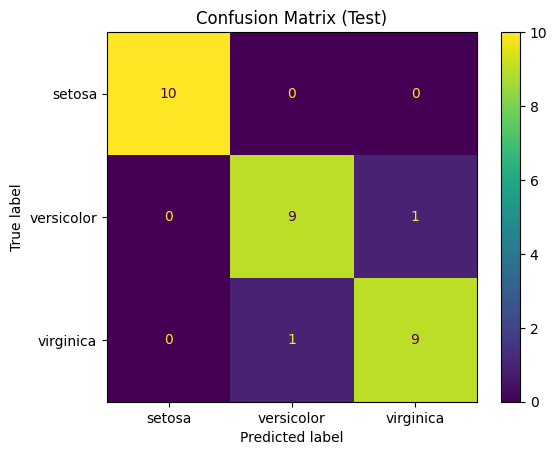

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [7]:
y_pred = logreg.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(values_format='d')
plt.title("Confusion Matrix (Test)")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

## 7) Try Some Predictions
We'll feed a couple of handmade samples to the trained model.

Order of features:
- sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

Each row below is `[sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]`.

In [8]:
X_new = np.array([
    [5.1, 3.5, 1.4, 0.2],  # likely setosa
    [6.0, 2.8, 4.5, 1.5],  # likely versicolor
    [6.5, 3.0, 5.5, 2.0],  # likely virginica
])
X_new_scaled = scaler.transform(X_new)
preds = logreg.predict(X_new_scaled)
probs = logreg.predict_proba(X_new_scaled)
for i, (p, pr) in enumerate(zip(preds, probs)):
    print(f"Sample {i}: predicted -> {target_names[p]} | probabilities -> {np.round(pr, 3)}")

Sample 0: predicted -> setosa | probabilities -> [0.981 0.019 0.   ]
Sample 1: predicted -> versicolor | probabilities -> [0.01  0.75  0.239]
Sample 2: predicted -> virginica | probabilities -> [0.    0.103 0.896]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 8) (Optional) Save Model
In case you want to persist the trained model and scaler for later use.

In [9]:
import joblib
joblib.dump(logreg, "logreg_iris.joblib")
joblib.dump(scaler, "scaler_iris.joblib")
print("Saved: logreg_iris.joblib and scaler_iris.joblib")

Saved: logreg_iris.joblib and scaler_iris.joblib


## 9) Homework Ideas (for students)
- Remove scaling and compare accuracy.
- Change `test_size` (e.g., 0.3) — how does it affect performance?
- Try `penalty='l1'` with solver `'liblinear'` and compare.
- Plot decision boundaries for two features at a time.
- Compute cross-validation accuracy using `cross_val_score`.


## Homework Idea 1: Remove scaling and compare accuracy

Let's train the Logistic Regression model without feature scaling and compare its accuracy with the scaled version.

In [10]:
# Train Logistic Regression without scaling
logreg_no_scale = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs', random_state=42)
logreg_no_scale.fit(X_train, y_train)
print("Training complete (no scaling).")

# Evaluate on Test Set (no scaling)
y_pred_no_scale = logreg_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, y_pred_no_scale)
print(f"Test Accuracy (no scaling): {acc_no_scale:.4f}")

# Compare with scaled accuracy
print(f"Test Accuracy (scaled): {acc:.4f}")

Training complete (no scaling).
Test Accuracy (no scaling): 0.9667
Test Accuracy (scaled): 0.9333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Homework Idea 2: Change test_size (e.g., 0.3) and observe performance

We will split the data with a `test_size` of 0.3 and see how it affects the test accuracy.

In [11]:
# Split data with test_size=0.3
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Train shape (test_size=0.3):", X_train_30.shape, " Test shape:", X_test_30.shape)

# Scale the data with test_size=0.3
scaler_30 = StandardScaler()
X_train_scaled_30 = scaler_30.fit_transform(X_train_30)
X_test_scaled_30  = scaler_30.transform(X_test_30)

# Train Logistic Regression with test_size=0.3
logreg_30 = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs', random_state=42)
logreg_30.fit(X_train_scaled_30, y_train_30)
print("Training complete (test_size=0.3).")

# Evaluate on Test Set with test_size=0.3
y_pred_30 = logreg_30.predict(X_test_scaled_30)
acc_30 = accuracy_score(y_test_30, y_pred_30)
print(f"Test Accuracy (test_size=0.3): {acc_30:.4f}")

# Compare with original accuracy (test_size=0.2)
print(f"Test Accuracy (test_size=0.2): {acc:.4f}")

Train shape (test_size=0.3): (105, 4)  Test shape: (45, 4)
Training complete (test_size=0.3).
Test Accuracy (test_size=0.3): 0.9111
Test Accuracy (test_size=0.2): 0.9333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Homework Idea 3: Try penalty='l1' with solver 'liblinear'

We'll train the model with L1 regularization and the 'liblinear' solver.

In [12]:
# Train Logistic Regression with L1 penalty and liblinear solver
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
logreg_l1.fit(X_train_scaled, y_train) # Using the original scaled data
print("Training complete (L1 penalty, liblinear solver).")

# Evaluate on Test Set
y_pred_l1 = logreg_l1.predict(X_test_scaled)
acc_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Test Accuracy (L1 penalty, liblinear solver): {acc_l1:.4f}")

# Compare with L2 penalty accuracy
print(f"Test Accuracy (L2 penalty, lbfgs solver): {acc:.4f}")

Training complete (L1 penalty, liblinear solver).
Test Accuracy (L1 penalty, liblinear solver): 0.8667
Test Accuracy (L2 penalty, lbfgs solver): 0.9333


## Homework Idea 4: Plot decision boundaries for two features

Let's visualize the decision boundaries for two features, for example, petal length and petal width. This requires training a model on only these two features.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training complete (petal features only).


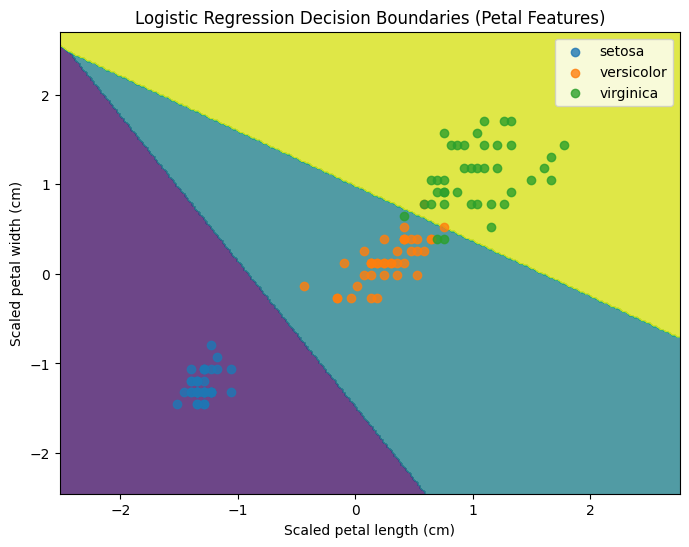

In [13]:
# Select only petal length and petal width
X_petal = X[[feature_names[2], feature_names[3]]]
y_petal = y

# Split the reduced data
X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(
    X_petal, y_petal, test_size=0.2, random_state=42, stratify=y_petal
)

# Scale the reduced data
scaler_petal = StandardScaler()
X_train_scaled_petal = scaler_petal.fit_transform(X_train_petal)
X_test_scaled_petal  = scaler_petal.transform(X_test_petal)

# Train Logistic Regression on the two features
logreg_petal = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs', random_state=42)
logreg_petal.fit(X_train_scaled_petal, y_train_petal)
print("Training complete (petal features only).")

# Plotting decision boundaries
x_min, x_max = X_train_scaled_petal[:, 0].min() - 1, X_train_scaled_petal[:, 0].max() + 1
y_min, y_max = X_train_scaled_petal[:, 1].min() - 1, X_train_scaled_petal[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = logreg_petal.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot also the training points
for cls in np.unique(y_train_petal):
    mask = (y_train_petal == cls)
    plt.scatter(X_train_scaled_petal[mask, 0], X_train_scaled_petal[mask, 1], label=target_names[cls], alpha=0.8)

plt.xlabel(f'Scaled {feature_names[2]}')
plt.ylabel(f'Scaled {feature_names[3]}')
plt.title("Logistic Regression Decision Boundaries (Petal Features)")
plt.legend()
plt.show()

## Homework Idea 5: Compute cross-validation accuracy using cross_val_score

We will use `cross_val_score` to get a more robust estimate of the model's performance.

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy if not already imported

# Scale the original data X for cross-validation
scaler_cv = StandardScaler()
X_scaled_cv = scaler_cv.fit_transform(X)


# Use the scaled data for cross-validation
scores = cross_val_score(logreg, X_scaled_cv, y, cv=5) # Using original scaled data X_scaled, y

print("Cross-validation accuracy scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation accuracy scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean cross-validation accuracy: 0.9600000000000002


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi